In [3]:
import numpy as np 
import pygad

In [4]:
data_inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
data_outputs = np.array([[0],[1],[1],[0]])
num_inputs = data_inputs.shape[1]

In [5]:
from pygad import nn 
import pygad.gann

num_solutions = 6
GANN_instance = pygad.gann.GANN(num_solutions=num_solutions,
                                num_neurons_input=num_inputs,
                                num_neurons_hidden_layers=[2],
                                num_neurons_output=2,
                                hidden_activations=["relu"],
                                output_activation="softmax")

In [6]:
population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)

In [7]:
def fitness_function(solution,sol_idx):
    global GANN_instance,data_inputs,data_outputs 
    predictions = nn.predict(last_layer=GANN_instance.population_networks[sol_idx],
                             data_inputs=data_inputs)
    correct_predictions = np.where(predictions == data_outputs)[0].size
    solution_fitness =  (correct_predictions/data_outputs.size)*100
    return solution_fitness

In [8]:
def callback_func(ga_instance):
    global GANN_instance
    population_matrices = pygad.gann.population_as_matrices(population_vectors=ga_instance.population,population_networks=GANN_instance.population_networks)
    GANN_instance.update_population_trained_weights(population_trained_weights=population_matrices)
    print("Gen: {generation} - Fitness: {fitness}".format(generation=ga_instance.generations_completed,fitness=ga_instance.best_solution()[1]))

In [10]:
init_pop = population_vectors.copy()
num_parents_mat = 4 
num_generations = 500
mutation_percent_genes = 5
parent_selection_type = "sss"
crossover_type = "single_point"
mutation_type = "random"
keep_parents = 1
init_range_low = -1
init_range_high = 5
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mat,
                       initial_population=init_pop,
                       fitness_func=fitness_function,
                       mutation_percent_genes=mutation_percent_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       keep_parents=keep_parents,
                       on_generation=callback_func)


In PyGAD 2.20.0, the fitness function must accept 3 parameters:
1) The instance of the 'pygad.GA' class.
2) A solution to calculate its fitness value.
3) The solution's index within the population.

The passed fitness function named 'fitness_function' accepts 2 parameter(s).
Traceback (most recent call last):
  File "c:\Users\anisr\miniconda3\envs\ml\lib\site-packages\pygad\pygad.py", line 951, in __init__
    raise ValueError(f"In PyGAD 2.20.0, the fitness function must accept 3 parameters:\n1) The instance of the 'pygad.GA' class.\n2) A solution to calculate its fitness value.\n3) The solution's index within the population.\n\nThe passed fitness function named '{fitness_func.__code__.co_name}' accepts {fitness_func.__code__.co_argcount} parameter(s).")
ValueError: In PyGAD 2.20.0, the fitness function must accept 3 parameters:
1) The instance of the 'pygad.GA' class.
2) A solution to calculate its fitness value.
3) The solution's index within the population.

The passed fitness funct

AssertionError: 

In [11]:
ga_instance.run()

NameError: name 'ga_instance' is not defined

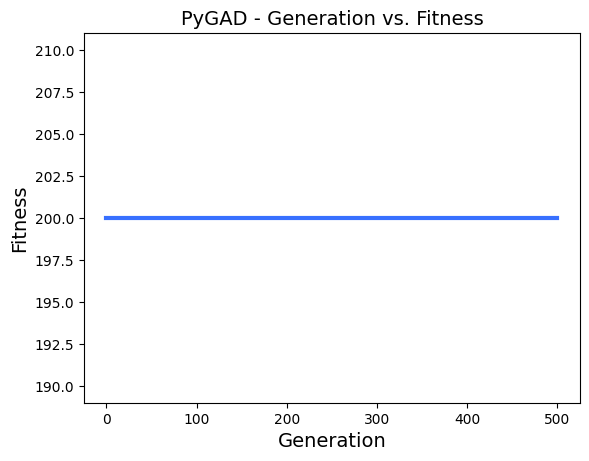

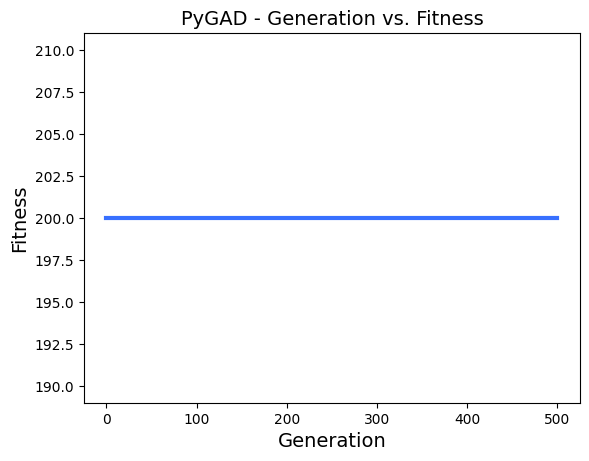

In [45]:
ga_instance.plot_fitness()

In [46]:
solution,sol_fitness,sol_idx = ga_instance.best_solution()
print("Best solution : {solution}".format(solution=solution))
print("Best solution fitness : {solution_fitness}".format(solution_fitness=sol_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=sol_idx))

Best solution : [-2.70917851 -4.92299195 -2.5581967   2.6452625   7.73551694 -2.49504268
  5.18450619 -1.78082831]
Best solution fitness : 200.0
Index of the best solution : 0


In [47]:
if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

Best fitness value reached after 0 generations.


In [48]:
predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],data_inputs=data_inputs)
print("Predictions of the trained network: ",predictions)

Predictions of the trained network:  [0, 0, 1, 0]


In [51]:
num_wrong = np.where(predictions != data_outputs)[0]
print("wrong predictions : {num_wrong}".format(num_wrong=num_wrong.size))

wrong predictions : 8


In [52]:
num_correct = num_wrong.size-data_outputs.size
accuracy = (num_correct/data_outputs.size)*100
print("Accuracy of the best solution : {accuracy} %".format(accuracy=accuracy))

Accuracy of the best solution : 100.0 %


-4